In [1]:
# Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_Spain = df[df['job_country'] == 'Spain'].copy()

In [3]:
df_Spain

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
115,Data Scientist,Azure Big Data Engineer,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-03-02 13:24:09,False,False,Spain,None,NaN,NaN,FHIOS Smart Knowledge,"['scala', 'azure']","{'cloud': ['azure'], 'programming': ['scala']}"
124,Data Scientist,DATA SCIENTIST,"Madrid, Spain",via LinkedIn,Full-time,False,Spain,2023-05-03 13:46:14,False,False,Spain,None,NaN,NaN,Joboss,"['sql', 'python', 'r', 'hadoop', 'spark', 'git...","{'async': ['jira'], 'libraries': ['hadoop', 's..."
226,Data Engineer,Data Engineer con Python,Spain,via LinkedIn,Full-time,False,Spain,2023-01-20 14:12:16,True,False,Spain,None,NaN,NaN,Keyrus,['python'],{'programming': ['python']}
258,Data Engineer,Data Engineer,"Barcelona, Spain",via BeBee,Full-time,False,Spain,2023-02-26 13:10:34,True,False,Spain,None,NaN,NaN,Michael Page,"['python', 'sql', 'postgresql', 'gcp', 'aws', ...","{'cloud': ['gcp', 'aws'], 'databases': ['postg..."
264,Senior Data Engineer,Senior Engineer- MS,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-02-08 21:45:53,False,False,Spain,None,NaN,NaN,NTT,['outlook'],{'analyst_tools': ['outlook']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785279,Data Analyst,Data - Product Analyst,Spain,via BeBee,Full-time,False,Spain,2023-01-03 06:37:18,False,False,Spain,None,NaN,NaN,InGame Recruitment,"['sql', 'bigquery', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
785284,Software Engineer,Senior Software Engineer,Spain,via BeBee,Full-time,False,Spain,2023-01-03 06:37:33,False,False,Spain,None,NaN,NaN,Ramp,"['typescript', 'css', 'html', 'javascript', 'r...","{'libraries': ['react'], 'programming': ['type..."
785320,Senior Data Scientist,Data Scientist Senior,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-01-02 06:43:42,False,False,Spain,None,NaN,NaN,BMIND,"['sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['sql']}"
785336,Data Engineer,Data Maintenance Apprentcie,"Barcelona, Spain",via BeBee,Full-time,False,Spain,2023-01-02 06:43:42,False,False,Spain,None,NaN,NaN,Firmenich,"['power bi', 'sap']","{'analyst_tools': ['power bi', 'sap']}"


In [4]:
df_Spain['job_posted_month'] = df_Spain['job_posted_date'].dt.strftime('%B')

In [5]:
df_Spain_pivot = df_Spain.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [6]:
df_Spain_pivot.reset_index(inplace=True)
df_Spain_pivot['month_no'] = pd.to_datetime(df_Spain_pivot['job_posted_month'], format='%B').dt.month
df_Spain_pivot.sort_values('month_no', inplace=True)
df_Spain_pivot.set_index('job_posted_month', inplace=True)
df_Spain_pivot.drop(columns='month_no', inplace=True)

In [7]:
df_Spain_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,187,65,560,835,597,51,64,218,178,205
February,127,31,399,569,453,48,42,121,111,128
March,74,23,363,558,351,34,35,127,86,92
April,45,24,361,566,380,33,51,99,95,101
May,49,11,395,513,390,29,36,111,65,40
June,77,26,344,440,347,37,39,89,77,79
July,74,22,382,470,427,41,41,96,114,74
August,129,47,541,467,666,54,88,101,159,108
September,127,61,403,517,448,52,37,115,110,142


In [10]:
df_Software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_Software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [13]:
df_merged = df_Spain_pivot.merge(df_Software_pivot, on="job_posted_month")

In [14]:
df_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,187,65,560,835,597,51,64,218,178,205,13619,9827,5108,4348
February,127,31,399,569,453,48,42,121,111,128,11456,9116,7298,4284
March,74,23,363,558,351,34,35,127,86,92,11102,8178,5814,4159
April,45,24,361,566,380,33,51,99,95,101,14037,9209,7232,4220
May,49,11,395,513,390,29,36,111,65,40,12126,8864,6718,4980
June,77,26,344,440,347,37,39,89,77,79,12003,8065,5902,4781
July,74,22,382,470,427,41,41,96,114,74,11914,8061,6839,4344
August,129,47,541,467,666,54,88,101,159,108,11571,8191,7413,4104
September,127,61,403,517,448,52,37,115,110,142,14016,8447,6139,4094


In [23]:
top_5 = (
    df_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index.   # Get the index of the top 5
    to_list()
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

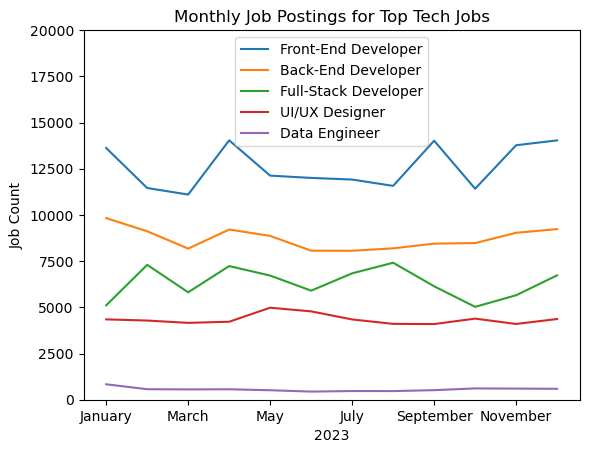

In [25]:
df_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()